In [1]:
# Importing necessary modeules
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, MaxPool2D, Dense
from tensorflow import keras
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os

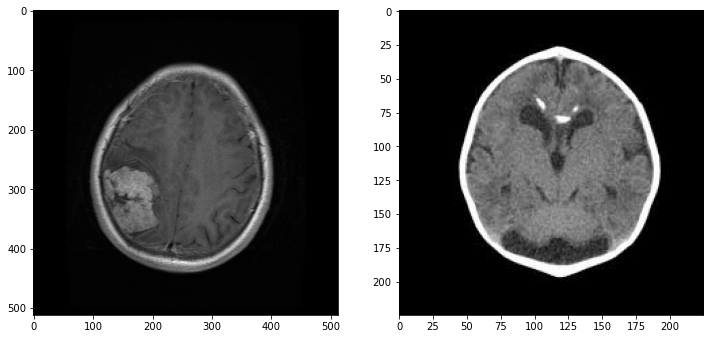

In [2]:
# Checking images
im = image.load_img("../train_tumor/Tumor/Tr-me_0010.jpg")
im1 = image.load_img("../train_tumor/NoTumor/Tr-no_0010.jpg")
fig, ax = plt.subplots(1,2, figsize=(12,12))
ax[0].imshow(im)
ax[1].imshow(im1)
plt.show()

In [3]:
# Checking image shape
# cv2.imread("../train/duck/001.jpg")

In [4]:
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

In [5]:
# Labeling Training datset
train_dataset = train.flow_from_directory("../train_tumor/", target_size=(200,200), batch_size=4, class_mode='binary')

Found 88 images belonging to 2 classes.


In [6]:
# Labeling Validation datset
validation_dataset = validation.flow_from_directory("../validation_tumor/", target_size=(200,200), batch_size=4, class_mode='binary')

Found 44 images belonging to 2 classes.


In [7]:
# test_dataset = test.flow_from_directory("../test/", target_size=(200,200), batch_size=4, class_mode='binary')

In [8]:
# Checking labels
train_dataset.class_indices

{'NoTumor': 0, 'Tumor': 1}

In [9]:
# Checking labels
validation_dataset.class_indices 

{'NoTumor': 0, 'Tumor': 1}

In [10]:
# Checking classes
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [11]:
nb_pool = 2
nb_conv = 3

In [13]:
import tensorflow as tf
print("Tensorflow:", tf.__version__)
layers = [
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), padding="same", activation=tf.nn.relu, input_shape=(200,200,3)),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding="same", activation=tf.nn.relu),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding="same", activation=tf.nn.relu),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), padding="same", activation=tf.nn.relu),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
    tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation=tf.nn.relu),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=512, activation=tf.nn.relu),
    tf.keras.layers.Dense(units=256, activation=tf.nn.relu),
    tf.keras.layers.Dense(units=2, activation=tf.nn.softmax)
]

model = tf.keras.Sequential(layers)
model.compile(optimizer=tf.optimizers.Adam(),
              loss=tf.losses.SparseCategoricalCrossentropy(),
              metrics=[tf.metrics.SparseCategoricalAccuracy()])
model.fit(train_dataset, epochs=20, batch_size=50)
model.save_weights("model.tf")

Tensorflow: 2.7.0
Epoch 1/20
22/22 [==============================] - 2s 98ms/step - loss: 0.6869 - sparse_categorical_accuracy: 0.5909
Epoch 2/20
22/22 [==============================] - 2s 105ms/step - loss: 0.6272 - sparse_categorical_accuracy: 0.7841
Epoch 3/20
22/22 [==============================] - 2s 94ms/step - loss: 0.4676 - sparse_categorical_accuracy: 0.7841
Epoch 4/20
22/22 [==============================] - 2s 97ms/step - loss: 0.3099 - sparse_categorical_accuracy: 0.8977
Epoch 5/20
22/22 [==============================] - 2s 95ms/step - loss: 0.2934 - sparse_categorical_accuracy: 0.9545
Epoch 6/20
22/22 [==============================] - 2s 94ms/step - loss: 0.1895 - sparse_categorical_accuracy: 0.9545
Epoch 7/20
22/22 [==============================] - 2s 95ms/step - loss: 0.1938 - sparse_categorical_accuracy: 0.9545
Epoch 8/20
22/22 [==============================] - 2s 100ms/step - loss: 0.1664 - sparse_categorical_accuracy: 0.9432
Epoch 9/20
22/22 [==================

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu,
                           input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(4,  activation=tf.nn.softmax)
])

# Creating CNN model
model = Sequential()
model.add(Conv2D(16, (3,3), activation='relu', input_shape=(200,200,1)))
model.add(MaxPool2D(2,2))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [13]:
# Compiling Model
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [14]:
# Fitting Model
model.fit(train_dataset, steps_per_epoch=3, epochs=50, validation_data=validation_dataset)

Epoch 1/50
3/3 [==============================] - 1s 294ms/step - loss: 0.7595 - accuracy: 0.2500 - val_loss: 0.6936 - val_accuracy: 0.5000
Epoch 2/50
3/3 [==============================] - 1s 222ms/step - loss: 0.6933 - accuracy: 0.4167 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/50
3/3 [==============================] - 1s 219ms/step - loss: 0.6932 - accuracy: 0.6667 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/50
3/3 [==============================] - 1s 226ms/step - loss: 0.6932 - accuracy: 0.4167 - val_loss: 0.6931 - val_accuracy: 0.4318
Epoch 5/50
3/3 [==============================] - 1s 218ms/step - loss: 0.6932 - accuracy: 0.5833 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 6/50
3/3 [==============================] - 1s 240ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.3409
Epoch 7/50
3/3 [==============================] - 1s 218ms/step - loss: 0.6932 - accuracy: 0.4167 - val_loss: 0.6931 - val_accuracy: 0.4318
Epoch 8/50
3/3 [====

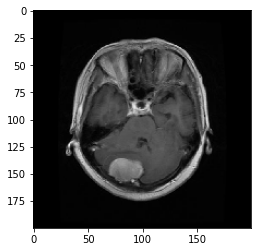

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [15]:
# Manually Predicting 
test_path = '../test_tumor/'
for i in os.listdir(test_path):
    img = image.load_img(test_path + "//" +i, target_size=(200,200))
    plt.imshow(img)
    plt.show()
    X = image.img_to_array(img)
    X = np.expand_dims(X, axis=0)
    images = np.vstack([X])
    value = model.predict(images)
    if value == 0:
        print('NoTumor')
    else:
        print('Tumor')